In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
63552,City Hotel,1,8,2019,April,7,14,0,1,2,...,0,No Deposit,9.0,NaN,0,Personal,88.00,0,1,Canceled
102943,City Hotel,0,58,2018,February,50,9,0,1,2,...,0,No Deposit,9.0,NaN,0,Personal,88.20,1,2,Check-Out
75069,City Hotel,1,278,2017,September,30,22,0,2,2,...,0,Non Refund,1.0,NaN,0,Family,62.00,0,0,Canceled
45498,City Hotel,1,100,2017,December,44,31,1,1,2,...,0,No Deposit,1.0,NaN,0,Family,62.00,0,0,Canceled
113772,City Hotel,0,43,2019,August,23,9,1,2,2,...,0,No Deposit,9.0,NaN,0,Personal,153.33,0,1,Check-Out


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.duplicated().sum()

33261

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
count_nv = pd.DataFrame(df.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(df) ) * 100
count_nv[count_nv['Percentage'] != 0].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage
22,company,81019,94.067039
21,agent,11941,13.864088
13,city,450,0.522472
10,children,4,0.004644


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86125.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,74188.000000,5110.000000,86129.000000,86129.000000,86129.000000,86129.000000
mean,0.275587,79.246224,2018.215467,26.796433,15.806511,1.009753,2.633225,1.878554,0.140284,0.010984,0.039499,0.030570,0.186569,0.271987,94.268655,182.034247,0.645114,106.634109,0.085233,0.705059
std,0.446812,85.498774,0.683948,13.675130,8.840436,1.033402,2.058316,0.627558,0.458347,0.114421,0.194780,0.371465,1.744405,0.729529,113.165107,130.565735,9.282699,55.175319,0.283070,0.833525
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,46.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.750000,0.000000,1.000000
75%,1.000000,124.000000,2019.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.510000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Overcoming Null Data

In [8]:
df['children'].fillna(0, inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace =True)

# because company have more than 50% of null data, so we delete it
df.drop('company', axis=1, inplace=True)

# Fix the data type
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')

## Change Value 

### Change value at Meal column

In [9]:
df['meal'].value_counts()

Breakfast     67088
No Meal        9442
Dinner         8798
Undefined       454
Full Board      347
Name: meal, dtype: int64

In [10]:
df['meal'].replace('Undefined', 'No Meal', inplace=True)

In [11]:
df['meal'].value_counts()

Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

### Look up undefined value in column in dataframe and replace them.

In [12]:
a = list(df.columns[df.isin(['Undefined']).any()])
a

['market_segment', 'distribution_channel']

In [13]:
df[a].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   market_segment        86129 non-null  object
 1   distribution_channel  86129 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [14]:
for i in a:
    if df[i].dtypes == object:
        df[i].replace('Undefined', df[i].mode()[0], inplace=True)
    else:
        df[i].replace('Undefined', df[i].median(), inplace=True)

## Discard unnecessary data

### Remove data that have an unreasonable total customer.

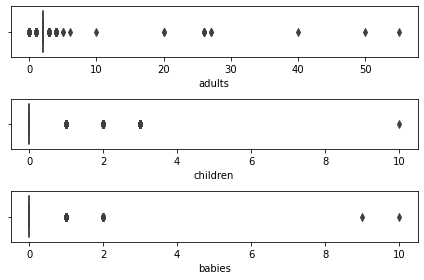

In [15]:
check = ['adults', 'children', 'babies']
plt.figure(figsize=(6,4))

for i, column in enumerate (df[check].columns, 1):
    plt.subplot(3,1,i)
    sns.boxplot(data=df[check], x=df[column])
    plt.tight_layout()

we can see that we have an outlier in the total number of guests data, but it's not problem because sometimes a customer do the hotel booking for his family/company/etc, and we have ambigious data, there is data that dont have adults on hotel bookings.

In [16]:
df.shape

(86129, 28)

In [17]:
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df = df[~ ((df['adults'] == 0) & (df['total_guest'] == 0))]
df.shape

(85964, 29)

### Remove Data that have stay duration = 0

In [18]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df = df[~ (df['stay_duration'] == 0)]
df.shape

(85378, 30)

# Monthly Hotel Booking Analysis Based on Hotel Type

In [62]:
ta_1 = df.groupby(['hotel', 'arrival_date_month']).agg({'lead_time': 'count', 'arrival_date_year' : 'nunique'}).reset_index()

In [63]:
ta_1['Average_cust'] = np.ceil(ta_1['lead_time'] / ta_1['arrival_date_year']).astype(int)
ta_1.columns = ['hotel_type', 'arrival_month', 'Total_customer', 'unique_year', 'average_cust']

In [64]:
ta_1['arrival_month'] = ta_1['arrival_month'].astype(str)
ta_1['Month'] = ta_1['arrival_month'].str.slice(0,3)
ta_1

,hotel_type,arrival_month,Total_customer,unique_year,average_cust,Month
0,City Hotel,April,3514,2,1757,Apr
1,City Hotel,August,4908,2,2454,Aug
2,City Hotel,December,4009,2,2005,Dec
3,City Hotel,February,2952,2,1476,Feb
4,City Hotel,January,2849,2,1425,Jan
5,City Hotel,July,5321,2,2661,Jul
6,City Hotel,June,5017,2,2509,Jun
7,City Hotel,March,2674,2,1337,Mar
8,City Hotel,May,4777,2,2389,May
9,City Hotel,November,4040,2,2020,Nov


In [65]:
list_name_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']
ta_1['arrival_month'] = pd.Categorical(ta_1['arrival_month'], categories=list_name_of_months, ordered=True)
ta_1 = ta_1.sort_values(by=['hotel_type', 'arrival_month'])

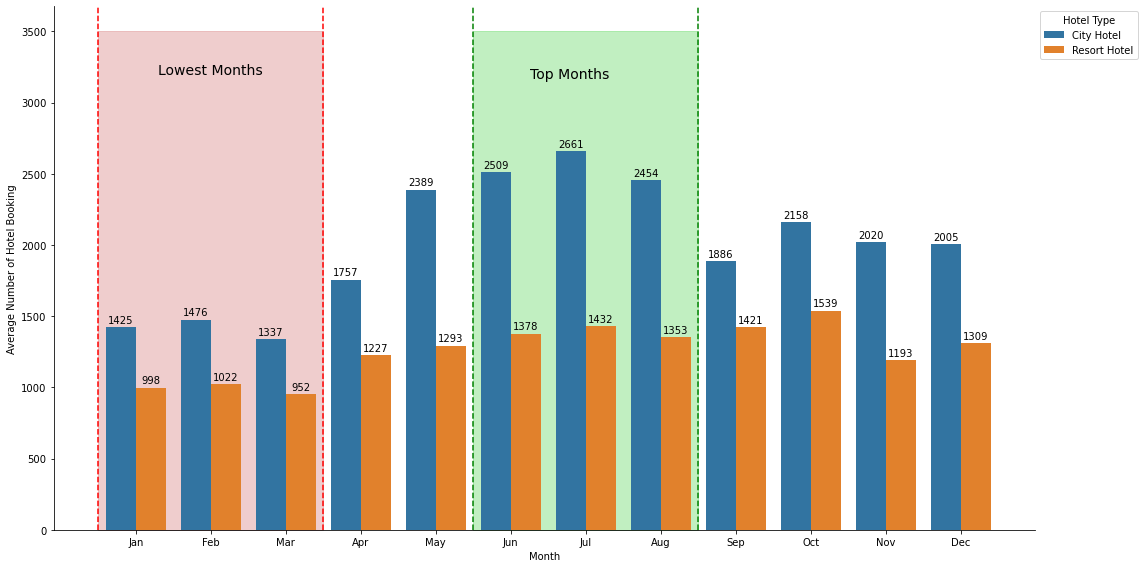

In [105]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='Month', y='average_cust', data = ta_1, hue = 'hotel_type')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Hotel Type')

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.ylabel('Average Number of Hotel Booking')

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,8.5), [[3500]], color='limegreen', alpha=0.3)
plt.text(x=5.25, y=3200, s='Top Months', fontsize=14, color='black', va='center')

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5), [[3500]], color='indianred', alpha=0.3)
plt.text(x=1, y=3200, s='Lowest Months', fontsize=14, color='black', ha='center')

sns.despine()   # remove the upper and right line
plt.tight_layout()

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [115]:
group_duration = []
for i in df['stay_duration']:
    if i <= 7:
        group = '1 week'
    elif i <= 14 :
        group = '2 weeks'
    elif i <= 21 :
        group = '3 weeks'
    elif i <= 28 :
        group = '4 weeks'
    else :
        group = '> 4 weeks'
    group_duration.append(group)
    
df['stay_duration_grup'] = group_duration

In [118]:
ta_2 = df.groupby(['hotel', 'stay_duration_grup', 'is_canceled'])['meal'].count().reset_index()
ta_2.rename(columns={'meal' : 'booking'}, inplace=True)
ta_2

,hotel,stay_duration_grup,is_canceled,booking
0,City Hotel,1 week,0,35845
1,City Hotel,1 week,1,15192
2,City Hotel,2 weeks,0,486
3,City Hotel,2 weeks,1,523
4,City Hotel,3 weeks,0,27
5,City Hotel,3 weeks,1,73
6,City Hotel,4 weeks,0,4
7,City Hotel,4 weeks,1,21
8,City Hotel,> 4 weeks,0,2
9,City Hotel,> 4 weeks,1,18


### Make a percentage of bookings canceled or not based on the type of hotel and length of stay

In [154]:
a = list(ta_2['hotel'].unique())
b = list(ta_2['stay_duration_grup'].unique())

percentage = []

for i in a:
    data = ta_2[ta_2['hotel'] == i]
    for x in b:
        data2 = data[data['stay_duration_grup'] == x]
        total_cust = data2['booking'].sum()
        for y in range(len(data2)):
            percent = np.round((data2['booking'].iloc[y] / total_cust) * 100 , 2)
            percentage.append(percent)
            
ta_2['Percentage'] = percentage
ta_2

,hotel,stay_duration_grup,is_canceled,booking,Percentage
0,City Hotel,1 week,0,35845,70.23
1,City Hotel,1 week,1,15192,29.77
2,City Hotel,2 weeks,0,486,48.17
3,City Hotel,2 weeks,1,523,51.83
4,City Hotel,3 weeks,0,27,27.00
5,City Hotel,3 weeks,1,73,73.00
6,City Hotel,4 weeks,0,4,16.00
7,City Hotel,4 weeks,1,21,84.00
8,City Hotel,> 4 weeks,0,2,10.00
9,City Hotel,> 4 weeks,1,18,90.00


In [155]:
ta_22 = ta_2[ta_2['is_canceled'] == 1]
ta_22

,hotel,stay_duration_grup,is_canceled,booking,Percentage
1,City Hotel,1 week,1,15192,29.77
3,City Hotel,2 weeks,1,523,51.83
5,City Hotel,3 weeks,1,73,73.00
7,City Hotel,4 weeks,1,21,84.00
9,City Hotel,> 4 weeks,1,18,90.00
11,Resort Hotel,1 week,1,6858,23.23
13,Resort Hotel,2 weeks,1,939,27.22
15,Resort Hotel,3 weeks,1,47,35.07
17,Resort Hotel,4 weeks,1,20,35.71
19,Resort Hotel,> 4 weeks,1,6,25.00


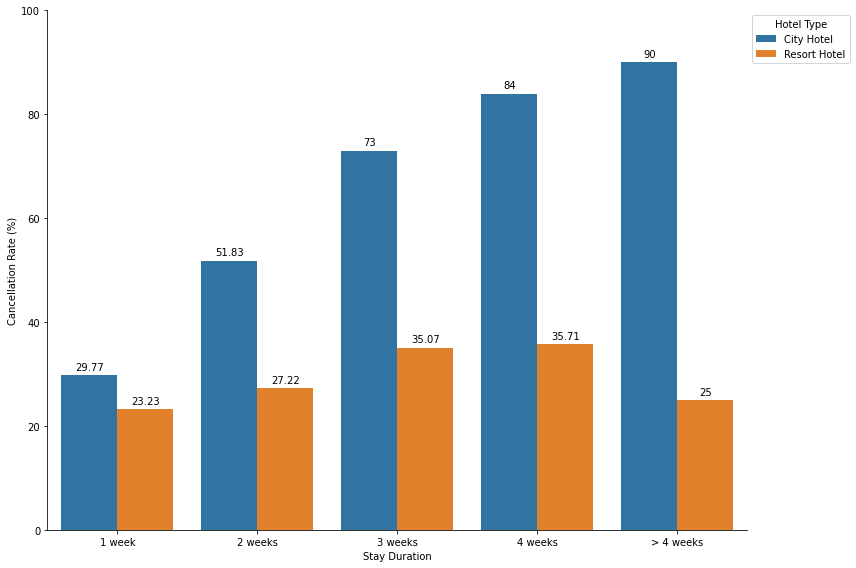

In [166]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = ta_22, x='stay_duration_grup', y='Percentage', hue='hotel')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Stay Duration')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Hotel Type')
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=3)
plt.bar_label(ax.containers[1], padding=3)

sns.despine()
plt.tight_layout()
plt.show()

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [171]:
df['lead_time'].describe()

count    85378.000000
mean        79.647567
std         85.517499
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        709.000000
Name: lead_time, dtype: float64

In [190]:
lead_time_cat = []

for i in df['lead_time']:
    if i <= 60:
        group = '1-2 Months'
    elif i <= 120:
        group = '3-4 Months'
    elif i <= 180:
        group = '5-6 Months'
    elif i <= 240:
        group = '7-8 Months'
    elif i <= 300:
        group = '9-10 Months'
    elif i <= 360:
        group ='11-12 Months'
    else:
        group = 'More Than 1 Year'
        
    lead_time_cat.append(group)

df['lead_time_cat'] = lead_time_cat

In [191]:
ta_3 = df.groupby(['hotel', 'is_canceled', 'lead_time_cat'])['meal'].count().reset_index().sort_values(by = ['lead_time_cat', 'hotel'])
ta_3.rename(columns={'meal' : 'booking'}, inplace=True)
ta_3.head()

,hotel,is_canceled,lead_time_cat,booking
0,City Hotel,0,1-2 Months,21842
7,City Hotel,1,1-2 Months,6811
14,Resort Hotel,0,1-2 Months,15266
21,Resort Hotel,1,1-2 Months,2982
1,City Hotel,0,11-12 Months,287


In [192]:
a = list(ta_3['hotel'].unique())
b = list(ta_3['lead_time_cat'].unique())

percentage = []

for i in a:
    data = ta_3[ta_3['hotel'] == i]
    for x in b:
        data2 = data[data['lead_time_cat'] == x]
        total_cust = data2['booking'].sum()
        for y in range(len(data2)):
            percent = np.round((data2['booking'].iloc[y] / total_cust) * 100 , 2)
            percentage.append(percent)
            
ta_3['Percentage'] = percentage
ta_3.head()

,hotel,is_canceled,lead_time_cat,booking,Percentage
0,City Hotel,0,1-2 Months,21842,76.23
7,City Hotel,1,1-2 Months,6811,23.77
14,Resort Hotel,0,1-2 Months,15266,40.77
21,Resort Hotel,1,1-2 Months,2982,59.23
1,City Hotel,0,11-12 Months,287,65.31


In [193]:
list_name_of_lead_time = ['1-2 Months', '3-4 Months', '5-6 Months', '7-8 Months', '9-10 Months', 
                       '11-12 Months', 'More Than 1 Year']
ta_3['lead_time_cat'] = pd.Categorical(ta_3['lead_time_cat'], categories=list_name_of_lead_time, ordered=True)
ta_3 = ta_3[ta_3['is_canceled'] == 1].sort_values(by=['hotel', 'lead_time_cat'])

In [194]:
ta_3

,hotel,is_canceled,lead_time_cat,booking,Percentage
7,City Hotel,1,1-2 Months,6811,23.77
9,City Hotel,1,3-4 Months,3772,40.34
10,City Hotel,1,5-6 Months,2482,53.64
11,City Hotel,1,7-8 Months,1405,43.33
12,City Hotel,1,9-10 Months,741,31.52
8,City Hotel,1,11-12 Months,417,34.69
13,City Hotel,1,More Than 1 Year,199,35.07
21,Resort Hotel,1,1-2 Months,2982,59.23
23,Resort Hotel,1,3-4 Months,1726,49.83
24,Resort Hotel,1,5-6 Months,1325,16.34


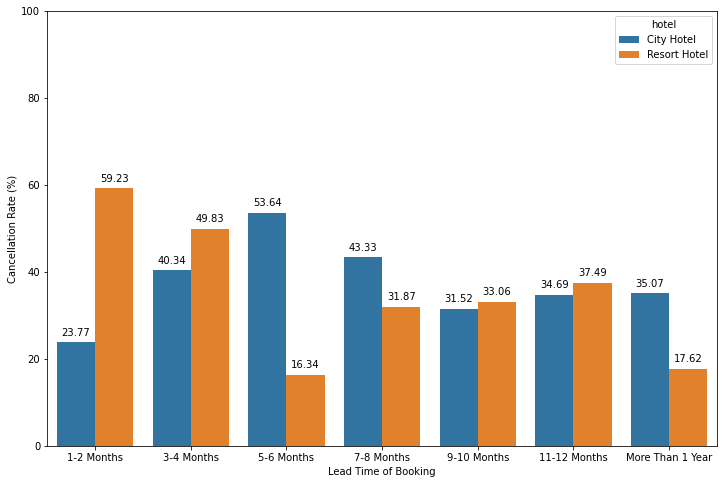

In [204]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = ta_3, x='lead_time_cat', y='Percentage', hue='hotel')

plt.ylim(0,100)
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Lead Time of Booking')

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=5)

plt.show()